# Computer Vision Homework 3: Big vs Small Models

## Brief

Due date: Nov 13, 2023

Required files: `homework-3.ipynb`, `report.pdf`

To download the jupyter notebook from colab, you can refer to the colab tutorial we gave.


## Codes for Problem 1 and Problem 2

### Import Packages

In [45]:
import glob
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from PIL import Image
from torch.utils.data import DataLoader, Dataset, RandomSampler
from torchvision import transforms, models, datasets
from tqdm import tqdm

%matplotlib inline

### Check GPU Environment

In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


In [47]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a91d2d3e-97e1-0ca7-8efa-a5a4420acb32)


### Set the Seed to Reproduce the Result

In [48]:
def set_all_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
set_all_seed(123)

### Create Dataset and Dataloader

In [49]:
batch_size = 256

mean = (0.4914, 0.4822, 0.4465)
std = (0.2471, 0.2435, 0.2616)
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=train_transform)
valid_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=test_transform)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

sixteenth_train_sampler = RandomSampler(train_dataset, num_samples=len(train_dataset)//16)
half_train_sampler = RandomSampler(train_dataset, num_samples=len(train_dataset)//2)

sixteenth_train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=sixteenth_train_sampler)
half_train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=half_train_sampler)

Files already downloaded and verified
Files already downloaded and verified


### Load Models

In [50]:
# HINT: Remember to change the model to 'resnet50' and the weights to weights="IMAGENET1K_V1" when needed.
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)

# Background: The original resnet18 is designed for ImageNet dataset to predict 1000 classes.
# TODO: Change the output of the model to 10 class.
model.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model=model.to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


### Training and Testing Models

100%|██████████| 40/40 [00:03<00:00, 12.65it/s]


Epoch  1: Loss = 2.1860 Acc = 0.01 Test_Loss = 2.0108 Test_Acc = 0.25


100%|██████████| 40/40 [00:03<00:00, 13.09it/s]


Epoch  2: Loss = 1.8685 Acc = 0.02 Test_Loss = 1.9471 Test_Acc = 0.31


100%|██████████| 40/40 [00:03<00:00, 11.03it/s]


Epoch  3: Loss = 1.7610 Acc = 0.02 Test_Loss = 1.8004 Test_Acc = 0.37


100%|██████████| 40/40 [00:03<00:00, 13.16it/s]


Epoch  4: Loss = 1.7196 Acc = 0.02 Test_Loss = 1.6914 Test_Acc = 0.38


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch  5: Loss = 1.6246 Acc = 0.02 Test_Loss = 1.5849 Test_Acc = 0.43


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch  6: Loss = 1.6229 Acc = 0.03 Test_Loss = 1.5866 Test_Acc = 0.42


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch  7: Loss = 1.5839 Acc = 0.03 Test_Loss = 1.6177 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 11.95it/s]


Epoch  8: Loss = 1.5253 Acc = 0.03 Test_Loss = 1.5315 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Epoch  9: Loss = 1.4730 Acc = 0.03 Test_Loss = 1.4764 Test_Acc = 0.47


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]


Epoch 10: Loss = 1.4525 Acc = 0.03 Test_Loss = 1.5027 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 13.19it/s]


Epoch 11: Loss = 1.4031 Acc = 0.03 Test_Loss = 1.5274 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 12: Loss = 1.4595 Acc = 0.03 Test_Loss = 1.3767 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 13.15it/s]


Epoch 13: Loss = 1.3729 Acc = 0.03 Test_Loss = 1.3601 Test_Acc = 0.50


100%|██████████| 40/40 [00:02<00:00, 13.35it/s]


Epoch 14: Loss = 1.3855 Acc = 0.03 Test_Loss = 1.3118 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 12.22it/s]


Epoch 15: Loss = 1.3541 Acc = 0.03 Test_Loss = 1.3023 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 13.23it/s]


Epoch 16: Loss = 1.3029 Acc = 0.03 Test_Loss = 1.3567 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 10.54it/s]


Epoch 17: Loss = 1.3358 Acc = 0.03 Test_Loss = 1.7084 Test_Acc = 0.44


100%|██████████| 40/40 [00:02<00:00, 13.48it/s]


Epoch 18: Loss = 1.3537 Acc = 0.03 Test_Loss = 1.4289 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 12.66it/s]


Epoch 19: Loss = 1.2665 Acc = 0.03 Test_Loss = 1.2215 Test_Acc = 0.56


100%|██████████| 40/40 [00:02<00:00, 13.33it/s]


Epoch 20: Loss = 1.2547 Acc = 0.03 Test_Loss = 1.2647 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 13.23it/s]


Epoch 21: Loss = 1.2628 Acc = 0.03 Test_Loss = 1.2990 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 10.95it/s]


Epoch 22: Loss = 1.2494 Acc = 0.03 Test_Loss = 1.2392 Test_Acc = 0.56


100%|██████████| 40/40 [00:02<00:00, 13.37it/s]


Epoch 23: Loss = 1.1777 Acc = 0.04 Test_Loss = 1.2821 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 10.49it/s]


Epoch 24: Loss = 1.2253 Acc = 0.03 Test_Loss = 1.1608 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 12.55it/s]


Epoch 25: Loss = 1.2317 Acc = 0.03 Test_Loss = 1.2205 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 12.56it/s]


Epoch 26: Loss = 1.1713 Acc = 0.04 Test_Loss = 1.1886 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 27: Loss = 1.2028 Acc = 0.04 Test_Loss = 1.1845 Test_Acc = 0.58


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch 28: Loss = 1.1481 Acc = 0.04 Test_Loss = 1.2015 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.05it/s]


Epoch 29: Loss = 1.1707 Acc = 0.04 Test_Loss = 1.5548 Test_Acc = 0.48


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 30: Loss = 1.1600 Acc = 0.04 Test_Loss = 1.1385 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 10.65it/s]


Epoch 31: Loss = 1.2112 Acc = 0.04 Test_Loss = 1.2047 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 32: Loss = 1.1809 Acc = 0.04 Test_Loss = 1.1069 Test_Acc = 0.61


100%|██████████| 40/40 [00:02<00:00, 13.37it/s]


Epoch 33: Loss = 1.0949 Acc = 0.04 Test_Loss = 1.3123 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 12.73it/s]


Epoch 34: Loss = 1.1156 Acc = 0.04 Test_Loss = 1.1085 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 13.14it/s]


Epoch 35: Loss = 1.0998 Acc = 0.04 Test_Loss = 1.0955 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 10.82it/s]


Epoch 36: Loss = 1.0962 Acc = 0.04 Test_Loss = 1.0458 Test_Acc = 0.63


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 37: Loss = 1.0908 Acc = 0.04 Test_Loss = 1.0193 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Epoch 38: Loss = 1.0723 Acc = 0.04 Test_Loss = 1.0388 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]


Epoch 39: Loss = 1.0612 Acc = 0.04 Test_Loss = 1.0568 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 13.27it/s]


Epoch 40: Loss = 1.0762 Acc = 0.04 Test_Loss = 1.0693 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 12.54it/s]


Epoch 41: Loss = 1.0560 Acc = 0.04 Test_Loss = 1.0709 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 12.46it/s]


Epoch 42: Loss = 1.0754 Acc = 0.04 Test_Loss = 1.0388 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 10.72it/s]


Epoch 43: Loss = 1.0330 Acc = 0.04 Test_Loss = 1.0202 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 13.12it/s]


Epoch 44: Loss = 1.0415 Acc = 0.04 Test_Loss = 1.1210 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 45: Loss = 1.0204 Acc = 0.04 Test_Loss = 0.9869 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 13.19it/s]


Epoch 46: Loss = 1.0243 Acc = 0.04 Test_Loss = 1.1511 Test_Acc = 0.61


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]


Epoch 47: Loss = 1.0559 Acc = 0.04 Test_Loss = 1.0525 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 12.13it/s]


Epoch 48: Loss = 1.0118 Acc = 0.04 Test_Loss = 1.0267 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 49: Loss = 1.0547 Acc = 0.04 Test_Loss = 1.1826 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 10.47it/s]


Epoch 50: Loss = 1.0179 Acc = 0.04 Test_Loss = 1.0370 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 51: Loss = 0.9994 Acc = 0.04 Test_Loss = 1.0568 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 12.60it/s]


Epoch 52: Loss = 0.9931 Acc = 0.04 Test_Loss = 1.0529 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 12.98it/s]


Epoch 53: Loss = 0.9679 Acc = 0.04 Test_Loss = 1.0711 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 54: Loss = 0.9428 Acc = 0.04 Test_Loss = 0.9584 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 55: Loss = 0.9451 Acc = 0.04 Test_Loss = 1.0409 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 56: Loss = 0.9798 Acc = 0.04 Test_Loss = 1.0101 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 10.46it/s]


Epoch 57: Loss = 0.9771 Acc = 0.04 Test_Loss = 0.9789 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 58: Loss = 0.9205 Acc = 0.04 Test_Loss = 0.9685 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.41it/s]


Epoch 59: Loss = 0.9551 Acc = 0.04 Test_Loss = 1.0957 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 60: Loss = 0.9495 Acc = 0.04 Test_Loss = 1.0772 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 13.28it/s]


Epoch 61: Loss = 0.9330 Acc = 0.04 Test_Loss = 1.0286 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.60it/s]


Epoch 62: Loss = 0.9329 Acc = 0.04 Test_Loss = 0.9431 Test_Acc = 0.67


100%|██████████| 40/40 [00:02<00:00, 13.41it/s]


Epoch 63: Loss = 0.9545 Acc = 0.04 Test_Loss = 0.9465 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]


Epoch 64: Loss = 0.9298 Acc = 0.04 Test_Loss = 0.9659 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 65: Loss = 0.9113 Acc = 0.04 Test_Loss = 0.9740 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 12.40it/s]


Epoch 66: Loss = 0.9073 Acc = 0.04 Test_Loss = 1.0351 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 12.75it/s]


Epoch 67: Loss = 0.9193 Acc = 0.04 Test_Loss = 0.9064 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 12.89it/s]


Epoch 68: Loss = 0.9082 Acc = 0.04 Test_Loss = 0.9538 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 69: Loss = 0.8888 Acc = 0.04 Test_Loss = 0.9168 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Epoch 70: Loss = 0.8593 Acc = 0.04 Test_Loss = 0.9024 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 10.60it/s]


Epoch 71: Loss = 0.8956 Acc = 0.04 Test_Loss = 0.9078 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 13.26it/s]


Epoch 72: Loss = 0.9402 Acc = 0.04 Test_Loss = 0.9070 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 12.34it/s]


Epoch 73: Loss = 0.9086 Acc = 0.04 Test_Loss = 0.8962 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 13.15it/s]


Epoch 74: Loss = 0.8957 Acc = 0.04 Test_Loss = 0.8707 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Epoch 75: Loss = 0.8603 Acc = 0.04 Test_Loss = 1.0013 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]


Epoch 76: Loss = 0.8618 Acc = 0.04 Test_Loss = 0.9151 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 13.23it/s]


Epoch 77: Loss = 0.8543 Acc = 0.04 Test_Loss = 0.9208 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 10.46it/s]


Epoch 78: Loss = 0.9248 Acc = 0.04 Test_Loss = 0.8818 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch 79: Loss = 0.8935 Acc = 0.04 Test_Loss = 0.9054 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 12.12it/s]


Epoch 80: Loss = 0.8856 Acc = 0.04 Test_Loss = 0.9017 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 12.85it/s]


Epoch 81: Loss = 0.8524 Acc = 0.04 Test_Loss = 0.8604 Test_Acc = 0.70


100%|██████████| 40/40 [00:02<00:00, 13.55it/s]


Epoch 82: Loss = 0.8370 Acc = 0.04 Test_Loss = 0.8911 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch 83: Loss = 0.8352 Acc = 0.04 Test_Loss = 0.8858 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 12.94it/s]


Epoch 84: Loss = 0.7990 Acc = 0.05 Test_Loss = 0.8765 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.66it/s]


Epoch 85: Loss = 0.8684 Acc = 0.04 Test_Loss = 0.9573 Test_Acc = 0.67


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch 86: Loss = 0.8599 Acc = 0.04 Test_Loss = 0.9086 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 12.86it/s]


Epoch 87: Loss = 0.8524 Acc = 0.04 Test_Loss = 0.9369 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 13.00it/s]


Epoch 88: Loss = 0.8202 Acc = 0.04 Test_Loss = 0.9151 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 13.15it/s]


Epoch 89: Loss = 0.8619 Acc = 0.04 Test_Loss = 0.8668 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.93it/s]


Epoch 90: Loss = 0.8014 Acc = 0.05 Test_Loss = 0.8571 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 12.79it/s]


Epoch 91: Loss = 0.8114 Acc = 0.04 Test_Loss = 0.8054 Test_Acc = 0.72


100%|██████████| 40/40 [00:04<00:00,  9.77it/s]


Epoch 92: Loss = 0.8185 Acc = 0.04 Test_Loss = 0.7936 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 13.16it/s]


Epoch 93: Loss = 0.8286 Acc = 0.04 Test_Loss = 0.8640 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 12.55it/s]


Epoch 94: Loss = 0.7899 Acc = 0.04 Test_Loss = 0.8885 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 95: Loss = 0.7812 Acc = 0.05 Test_Loss = 0.8762 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.57it/s]


Epoch 96: Loss = 0.7969 Acc = 0.05 Test_Loss = 0.8486 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 10.95it/s]


Epoch 97: Loss = 0.8078 Acc = 0.04 Test_Loss = 0.9246 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 98: Loss = 0.8135 Acc = 0.04 Test_Loss = 0.7801 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.07it/s]


Epoch 99: Loss = 0.7742 Acc = 0.05 Test_Loss = 0.8182 Test_Acc = 0.71


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch 100: Loss = 0.7955 Acc = 0.05 Test_Loss = 0.8524 Test_Acc = 0.71
Done!


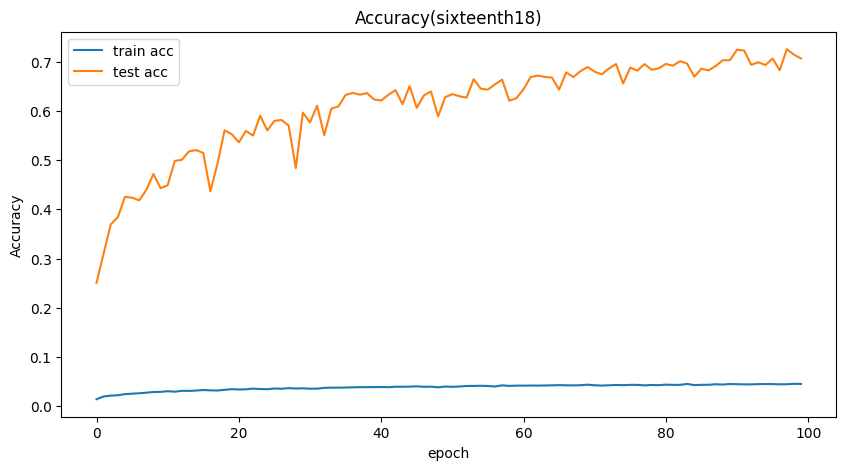

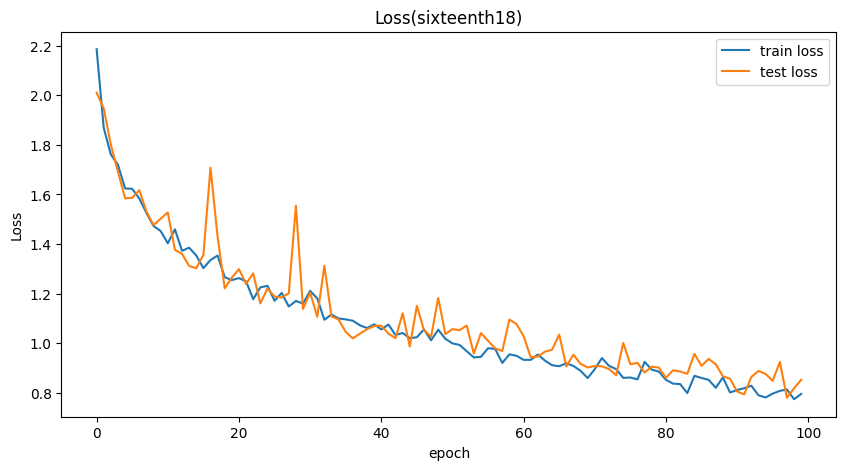

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 40/40 [00:03<00:00, 11.07it/s]


Epoch  1: Loss = 1.7009 Acc = 0.19 Test_Loss = 1.4459 Test_Acc = 0.47


100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch  2: Loss = 1.3982 Acc = 0.25 Test_Loss = 1.3871 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch  3: Loss = 1.2410 Acc = 0.27 Test_Loss = 1.1808 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch  4: Loss = 1.1274 Acc = 0.30 Test_Loss = 1.0577 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch  5: Loss = 1.0539 Acc = 0.31 Test_Loss = 1.0234 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 12.88it/s]


Epoch  6: Loss = 0.9991 Acc = 0.32 Test_Loss = 0.9771 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 10.92it/s]


Epoch  7: Loss = 0.9359 Acc = 0.33 Test_Loss = 0.9686 Test_Acc = 0.66


100%|██████████| 40/40 [00:02<00:00, 13.56it/s]


Epoch  8: Loss = 0.8974 Acc = 0.34 Test_Loss = 0.8894 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch  9: Loss = 0.8459 Acc = 0.35 Test_Loss = 0.8135 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch 10: Loss = 0.8374 Acc = 0.35 Test_Loss = 0.8035 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.19it/s]


Epoch 11: Loss = 0.7940 Acc = 0.36 Test_Loss = 0.8650 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 12.80it/s]


Epoch 12: Loss = 0.7634 Acc = 0.37 Test_Loss = 0.8035 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch 13: Loss = 0.7440 Acc = 0.37 Test_Loss = 0.7883 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch 14: Loss = 0.7256 Acc = 0.37 Test_Loss = 0.7532 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 10.97it/s]


Epoch 15: Loss = 0.6950 Acc = 0.38 Test_Loss = 0.7473 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 13.05it/s]


Epoch 16: Loss = 0.6888 Acc = 0.38 Test_Loss = 0.7503 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 17: Loss = 0.6675 Acc = 0.38 Test_Loss = 0.6737 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.48it/s]


Epoch 18: Loss = 0.6453 Acc = 0.38 Test_Loss = 0.7523 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 19: Loss = 0.6356 Acc = 0.39 Test_Loss = 0.6721 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 20: Loss = 0.6212 Acc = 0.39 Test_Loss = 0.6672 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.56it/s]


Epoch 21: Loss = 0.6192 Acc = 0.39 Test_Loss = 0.6665 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.36it/s]


Epoch 22: Loss = 0.5981 Acc = 0.40 Test_Loss = 0.7090 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch 23: Loss = 0.5935 Acc = 0.40 Test_Loss = 0.6299 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.64it/s]


Epoch 24: Loss = 0.5730 Acc = 0.40 Test_Loss = 0.7128 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.79it/s]


Epoch 25: Loss = 0.5677 Acc = 0.40 Test_Loss = 0.6344 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 26: Loss = 0.5465 Acc = 0.40 Test_Loss = 0.6152 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.94it/s]


Epoch 27: Loss = 0.5432 Acc = 0.41 Test_Loss = 0.6528 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 13.12it/s]


Epoch 28: Loss = 0.5385 Acc = 0.41 Test_Loss = 0.6385 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.57it/s]


Epoch 29: Loss = 0.5292 Acc = 0.41 Test_Loss = 0.5866 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.64it/s]


Epoch 30: Loss = 0.5217 Acc = 0.41 Test_Loss = 0.6073 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch 31: Loss = 0.5150 Acc = 0.41 Test_Loss = 0.6824 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 13.26it/s]


Epoch 32: Loss = 0.4970 Acc = 0.41 Test_Loss = 0.6042 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.59it/s]


Epoch 33: Loss = 0.5052 Acc = 0.41 Test_Loss = 0.5753 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


Epoch 34: Loss = 0.4843 Acc = 0.41 Test_Loss = 0.6415 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.49it/s]


Epoch 35: Loss = 0.4855 Acc = 0.42 Test_Loss = 0.6106 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.41it/s]


Epoch 36: Loss = 0.4778 Acc = 0.42 Test_Loss = 0.5495 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch 37: Loss = 0.4611 Acc = 0.42 Test_Loss = 0.6134 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 38: Loss = 0.4631 Acc = 0.42 Test_Loss = 0.5805 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.44it/s]


Epoch 39: Loss = 0.4467 Acc = 0.42 Test_Loss = 0.5901 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.54it/s]


Epoch 40: Loss = 0.4417 Acc = 0.42 Test_Loss = 0.5919 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.48it/s]


Epoch 41: Loss = 0.4406 Acc = 0.42 Test_Loss = 0.6175 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 42: Loss = 0.4400 Acc = 0.42 Test_Loss = 0.5831 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.79it/s]


Epoch 43: Loss = 0.4298 Acc = 0.42 Test_Loss = 0.5746 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 44: Loss = 0.4206 Acc = 0.43 Test_Loss = 0.5352 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.32it/s]


Epoch 45: Loss = 0.4202 Acc = 0.42 Test_Loss = 0.5878 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.97it/s]


Epoch 46: Loss = 0.4117 Acc = 0.43 Test_Loss = 0.5882 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 47: Loss = 0.4119 Acc = 0.43 Test_Loss = 0.5739 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 48: Loss = 0.3987 Acc = 0.43 Test_Loss = 0.5201 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.37it/s]


Epoch 49: Loss = 0.3916 Acc = 0.43 Test_Loss = 0.5701 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.12it/s]


Epoch 50: Loss = 0.3936 Acc = 0.43 Test_Loss = 0.5821 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch 51: Loss = 0.3817 Acc = 0.43 Test_Loss = 0.5345 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 52: Loss = 0.3813 Acc = 0.43 Test_Loss = 0.5788 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.17it/s]


Epoch 53: Loss = 0.3836 Acc = 0.43 Test_Loss = 0.5479 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.27it/s]


Epoch 54: Loss = 0.3651 Acc = 0.44 Test_Loss = 0.5424 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.77it/s]


Epoch 55: Loss = 0.3673 Acc = 0.44 Test_Loss = 0.5584 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.26it/s]


Epoch 56: Loss = 0.3567 Acc = 0.44 Test_Loss = 0.5518 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]


Epoch 57: Loss = 0.3493 Acc = 0.44 Test_Loss = 0.5378 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.21it/s]


Epoch 58: Loss = 0.3445 Acc = 0.44 Test_Loss = 0.5109 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


Epoch 59: Loss = 0.3548 Acc = 0.44 Test_Loss = 0.5550 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.20it/s]


Epoch 60: Loss = 0.3393 Acc = 0.44 Test_Loss = 0.5446 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.30it/s]


Epoch 61: Loss = 0.3291 Acc = 0.44 Test_Loss = 0.5484 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 62: Loss = 0.3373 Acc = 0.44 Test_Loss = 0.5211 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.63it/s]


Epoch 63: Loss = 0.3359 Acc = 0.44 Test_Loss = 0.5487 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.45it/s]


Epoch 64: Loss = 0.3232 Acc = 0.44 Test_Loss = 0.6537 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 65: Loss = 0.3240 Acc = 0.44 Test_Loss = 0.5593 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Epoch 66: Loss = 0.3168 Acc = 0.44 Test_Loss = 0.5436 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.88it/s]


Epoch 67: Loss = 0.3098 Acc = 0.44 Test_Loss = 0.5752 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch 68: Loss = 0.3098 Acc = 0.44 Test_Loss = 0.5528 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.36it/s]


Epoch 69: Loss = 0.3107 Acc = 0.44 Test_Loss = 0.5610 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.55it/s]


Epoch 70: Loss = 0.3121 Acc = 0.44 Test_Loss = 0.5536 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.55it/s]


Epoch 71: Loss = 0.2997 Acc = 0.45 Test_Loss = 0.5605 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.10it/s]


Epoch 72: Loss = 0.3010 Acc = 0.45 Test_Loss = 0.5766 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.34it/s]


Epoch 73: Loss = 0.3029 Acc = 0.45 Test_Loss = 0.5444 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.60it/s]


Epoch 74: Loss = 0.2826 Acc = 0.45 Test_Loss = 0.5465 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 75: Loss = 0.2780 Acc = 0.45 Test_Loss = 0.5935 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.93it/s]


Epoch 76: Loss = 0.2777 Acc = 0.45 Test_Loss = 0.5717 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 77: Loss = 0.2882 Acc = 0.45 Test_Loss = 0.5482 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.86it/s]


Epoch 78: Loss = 0.2668 Acc = 0.45 Test_Loss = 0.5548 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.18it/s]


Epoch 79: Loss = 0.2774 Acc = 0.45 Test_Loss = 0.5648 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.91it/s]


Epoch 80: Loss = 0.2599 Acc = 0.45 Test_Loss = 0.5692 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.42it/s]


Epoch 81: Loss = 0.2582 Acc = 0.45 Test_Loss = 0.5680 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.98it/s]


Epoch 82: Loss = 0.2569 Acc = 0.45 Test_Loss = 0.5869 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.83it/s]


Epoch 83: Loss = 0.2546 Acc = 0.45 Test_Loss = 0.6017 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.89it/s]


Epoch 84: Loss = 0.2673 Acc = 0.45 Test_Loss = 0.5499 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.05it/s]


Epoch 85: Loss = 0.2436 Acc = 0.46 Test_Loss = 0.5520 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.92it/s]


Epoch 86: Loss = 0.2518 Acc = 0.46 Test_Loss = 0.5796 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.46it/s]


Epoch 87: Loss = 0.2450 Acc = 0.46 Test_Loss = 0.5581 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 88: Loss = 0.2507 Acc = 0.46 Test_Loss = 0.5687 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch 89: Loss = 0.2383 Acc = 0.46 Test_Loss = 0.5544 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.89it/s]


Epoch 90: Loss = 0.2338 Acc = 0.46 Test_Loss = 0.5606 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.69it/s]


Epoch 91: Loss = 0.2350 Acc = 0.46 Test_Loss = 0.5850 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]


Epoch 92: Loss = 0.2329 Acc = 0.46 Test_Loss = 0.6283 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch 93: Loss = 0.2299 Acc = 0.46 Test_Loss = 0.5746 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.92it/s]


Epoch 94: Loss = 0.2343 Acc = 0.46 Test_Loss = 0.5815 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.21it/s]


Epoch 95: Loss = 0.2289 Acc = 0.46 Test_Loss = 0.5670 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.84it/s]


Epoch 96: Loss = 0.2235 Acc = 0.46 Test_Loss = 0.5809 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.20it/s]


Epoch 97: Loss = 0.2214 Acc = 0.46 Test_Loss = 0.5804 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.36it/s]


Epoch 98: Loss = 0.2208 Acc = 0.46 Test_Loss = 0.5888 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.17it/s]


Epoch 99: Loss = 0.2108 Acc = 0.46 Test_Loss = 0.5971 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.91it/s]


Epoch 100: Loss = 0.2224 Acc = 0.46 Test_Loss = 0.5563 Test_Acc = 0.84
Done!


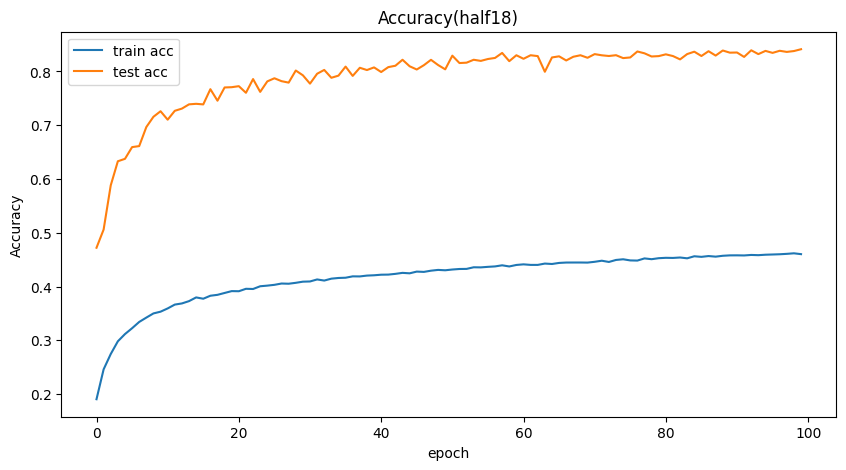

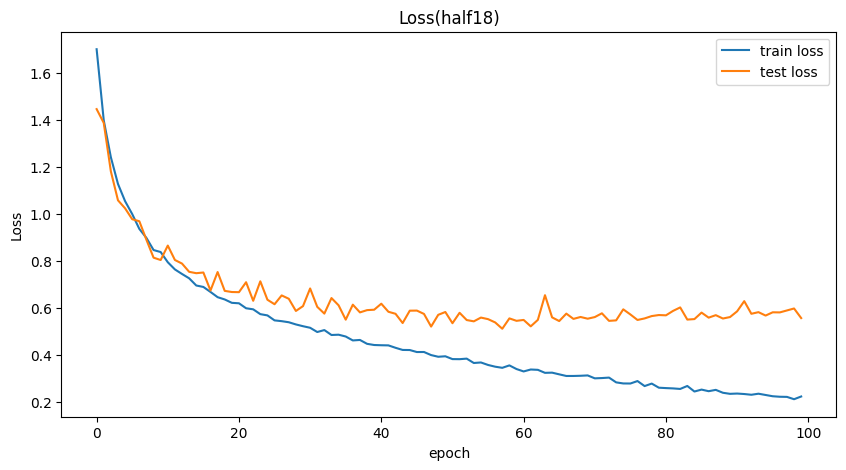

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 40/40 [00:03<00:00, 12.84it/s]


Epoch  1: Loss = 1.5799 Acc = 0.42 Test_Loss = 1.3372 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch  2: Loss = 1.2058 Acc = 0.57 Test_Loss = 1.1013 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 10.47it/s]


Epoch  3: Loss = 1.0427 Acc = 0.63 Test_Loss = 0.9611 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]


Epoch  4: Loss = 0.9510 Acc = 0.66 Test_Loss = 0.9197 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch  5: Loss = 0.8671 Acc = 0.69 Test_Loss = 0.9044 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 12.94it/s]


Epoch  6: Loss = 0.8148 Acc = 0.71 Test_Loss = 0.7776 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 12.97it/s]


Epoch  7: Loss = 0.7598 Acc = 0.73 Test_Loss = 0.7961 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 10.35it/s]


Epoch  8: Loss = 0.7152 Acc = 0.75 Test_Loss = 0.7377 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 12.99it/s]


Epoch  9: Loss = 0.6838 Acc = 0.76 Test_Loss = 0.7267 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 10: Loss = 0.6511 Acc = 0.77 Test_Loss = 0.7441 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 12.67it/s]


Epoch 11: Loss = 0.6233 Acc = 0.78 Test_Loss = 0.7035 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 12.46it/s]


Epoch 12: Loss = 0.5943 Acc = 0.79 Test_Loss = 0.6349 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.36it/s]


Epoch 13: Loss = 0.5806 Acc = 0.80 Test_Loss = 0.6562 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 13.29it/s]


Epoch 14: Loss = 0.5682 Acc = 0.80 Test_Loss = 0.6217 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.98it/s]


Epoch 15: Loss = 0.5373 Acc = 0.81 Test_Loss = 0.6263 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.92it/s]


Epoch 16: Loss = 0.5231 Acc = 0.82 Test_Loss = 0.6205 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.47it/s]


Epoch 17: Loss = 0.5036 Acc = 0.82 Test_Loss = 0.6010 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.52it/s]


Epoch 18: Loss = 0.4908 Acc = 0.83 Test_Loss = 0.5825 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch 19: Loss = 0.4800 Acc = 0.83 Test_Loss = 0.5805 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.18it/s]


Epoch 20: Loss = 0.4624 Acc = 0.84 Test_Loss = 0.6035 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 12.76it/s]


Epoch 21: Loss = 0.4539 Acc = 0.84 Test_Loss = 0.5748 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.78it/s]


Epoch 22: Loss = 0.4339 Acc = 0.85 Test_Loss = 0.5416 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.23it/s]


Epoch 23: Loss = 0.4254 Acc = 0.85 Test_Loss = 0.5634 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Epoch 24: Loss = 0.4128 Acc = 0.85 Test_Loss = 0.5875 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.70it/s]


Epoch 25: Loss = 0.4043 Acc = 0.86 Test_Loss = 0.5819 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.05it/s]


Epoch 26: Loss = 0.3968 Acc = 0.86 Test_Loss = 0.5518 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.91it/s]


Epoch 27: Loss = 0.3811 Acc = 0.86 Test_Loss = 0.5374 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.43it/s]


Epoch 28: Loss = 0.3722 Acc = 0.87 Test_Loss = 0.5790 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 29: Loss = 0.3596 Acc = 0.87 Test_Loss = 0.5358 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.12it/s]


Epoch 30: Loss = 0.3556 Acc = 0.88 Test_Loss = 0.5211 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.80it/s]


Epoch 31: Loss = 0.3422 Acc = 0.88 Test_Loss = 0.5215 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch 32: Loss = 0.3379 Acc = 0.88 Test_Loss = 0.5499 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]


Epoch 33: Loss = 0.3289 Acc = 0.88 Test_Loss = 0.5261 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.27it/s]


Epoch 34: Loss = 0.3161 Acc = 0.89 Test_Loss = 0.5551 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.74it/s]


Epoch 35: Loss = 0.3147 Acc = 0.89 Test_Loss = 0.5777 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.77it/s]


Epoch 36: Loss = 0.3049 Acc = 0.89 Test_Loss = 0.5448 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.03it/s]


Epoch 37: Loss = 0.3008 Acc = 0.89 Test_Loss = 0.5794 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch 38: Loss = 0.2949 Acc = 0.89 Test_Loss = 0.5332 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 39: Loss = 0.2800 Acc = 0.90 Test_Loss = 0.5825 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Epoch 40: Loss = 0.2720 Acc = 0.90 Test_Loss = 0.5568 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 41: Loss = 0.2696 Acc = 0.90 Test_Loss = 0.5465 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.40it/s]


Epoch 42: Loss = 0.2640 Acc = 0.91 Test_Loss = 0.5313 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.99it/s]


Epoch 43: Loss = 0.2631 Acc = 0.91 Test_Loss = 0.5709 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.77it/s]


Epoch 44: Loss = 0.2464 Acc = 0.91 Test_Loss = 0.5698 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.85it/s]


Epoch 45: Loss = 0.2435 Acc = 0.91 Test_Loss = 0.5408 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.81it/s]


Epoch 46: Loss = 0.2378 Acc = 0.92 Test_Loss = 0.5855 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.77it/s]


Epoch 47: Loss = 0.2305 Acc = 0.92 Test_Loss = 0.5578 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.94it/s]


Epoch 48: Loss = 0.2294 Acc = 0.92 Test_Loss = 0.6017 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.83it/s]


Epoch 49: Loss = 0.2238 Acc = 0.92 Test_Loss = 0.5936 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.50it/s]


Epoch 50: Loss = 0.2173 Acc = 0.92 Test_Loss = 0.5615 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.66it/s]


Epoch 51: Loss = 0.2151 Acc = 0.92 Test_Loss = 0.6148 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.85it/s]


Epoch 52: Loss = 0.2118 Acc = 0.92 Test_Loss = 0.5995 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Epoch 53: Loss = 0.2003 Acc = 0.93 Test_Loss = 0.6042 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.74it/s]


Epoch 54: Loss = 0.2032 Acc = 0.93 Test_Loss = 0.6009 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.05it/s]


Epoch 55: Loss = 0.1976 Acc = 0.93 Test_Loss = 0.6314 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.67it/s]


Epoch 56: Loss = 0.1924 Acc = 0.93 Test_Loss = 0.6415 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.19it/s]


Epoch 57: Loss = 0.1855 Acc = 0.93 Test_Loss = 0.6255 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 58: Loss = 0.1806 Acc = 0.93 Test_Loss = 0.6518 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch 59: Loss = 0.1821 Acc = 0.94 Test_Loss = 0.6074 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 60: Loss = 0.1708 Acc = 0.94 Test_Loss = 0.6295 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.93it/s]


Epoch 61: Loss = 0.1744 Acc = 0.94 Test_Loss = 0.6142 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch 62: Loss = 0.1705 Acc = 0.94 Test_Loss = 0.6626 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.05it/s]


Epoch 63: Loss = 0.1669 Acc = 0.94 Test_Loss = 0.6121 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.43it/s]


Epoch 64: Loss = 0.1582 Acc = 0.94 Test_Loss = 0.6259 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.33it/s]


Epoch 65: Loss = 0.1568 Acc = 0.94 Test_Loss = 0.6186 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.29it/s]


Epoch 66: Loss = 0.1586 Acc = 0.94 Test_Loss = 0.6474 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.03it/s]


Epoch 67: Loss = 0.1531 Acc = 0.95 Test_Loss = 0.7067 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.41it/s]


Epoch 68: Loss = 0.1531 Acc = 0.95 Test_Loss = 0.6358 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch 69: Loss = 0.1454 Acc = 0.95 Test_Loss = 0.6626 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 70: Loss = 0.1463 Acc = 0.95 Test_Loss = 0.6455 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 71: Loss = 0.1417 Acc = 0.95 Test_Loss = 0.6330 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 72: Loss = 0.1408 Acc = 0.95 Test_Loss = 0.6572 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 73: Loss = 0.1398 Acc = 0.95 Test_Loss = 0.6754 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.10it/s]


Epoch 74: Loss = 0.1396 Acc = 0.95 Test_Loss = 0.6929 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.81it/s]


Epoch 75: Loss = 0.1306 Acc = 0.95 Test_Loss = 0.6656 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.64it/s]


Epoch 76: Loss = 0.1339 Acc = 0.95 Test_Loss = 0.6770 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.52it/s]


Epoch 77: Loss = 0.1279 Acc = 0.95 Test_Loss = 0.6752 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.73it/s]


Epoch 78: Loss = 0.1262 Acc = 0.95 Test_Loss = 0.6576 Test_Acc = 0.85


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 79: Loss = 0.1273 Acc = 0.95 Test_Loss = 0.6694 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.04it/s]


Epoch 80: Loss = 0.1209 Acc = 0.96 Test_Loss = 0.6539 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.44it/s]


Epoch 81: Loss = 0.1185 Acc = 0.96 Test_Loss = 0.6985 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.15it/s]


Epoch 82: Loss = 0.1155 Acc = 0.96 Test_Loss = 0.7079 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.84it/s]


Epoch 83: Loss = 0.1225 Acc = 0.96 Test_Loss = 0.6906 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.36it/s]


Epoch 84: Loss = 0.1177 Acc = 0.96 Test_Loss = 0.6931 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.66it/s]


Epoch 85: Loss = 0.1162 Acc = 0.96 Test_Loss = 0.6713 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.47it/s]


Epoch 86: Loss = 0.1080 Acc = 0.96 Test_Loss = 0.7396 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.35it/s]


Epoch 87: Loss = 0.1117 Acc = 0.96 Test_Loss = 0.6915 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


Epoch 88: Loss = 0.1038 Acc = 0.96 Test_Loss = 0.6875 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.05it/s]


Epoch 89: Loss = 0.1108 Acc = 0.96 Test_Loss = 0.7253 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.53it/s]


Epoch 90: Loss = 0.1037 Acc = 0.96 Test_Loss = 0.7093 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 91: Loss = 0.1102 Acc = 0.96 Test_Loss = 0.7174 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.24it/s]


Epoch 92: Loss = 0.1021 Acc = 0.96 Test_Loss = 0.7099 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.34it/s]


Epoch 93: Loss = 0.0994 Acc = 0.97 Test_Loss = 0.6925 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.19it/s]


Epoch 94: Loss = 0.1001 Acc = 0.96 Test_Loss = 0.7459 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.40it/s]


Epoch 95: Loss = 0.1047 Acc = 0.96 Test_Loss = 0.7086 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]


Epoch 96: Loss = 0.0964 Acc = 0.97 Test_Loss = 0.7749 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


Epoch 97: Loss = 0.1024 Acc = 0.96 Test_Loss = 0.7190 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 98: Loss = 0.0963 Acc = 0.97 Test_Loss = 0.7327 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 12.58it/s]


Epoch 99: Loss = 0.0907 Acc = 0.97 Test_Loss = 0.7524 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.02it/s]


Epoch 100: Loss = 0.0918 Acc = 0.97 Test_Loss = 0.7114 Test_Acc = 0.85
Done!


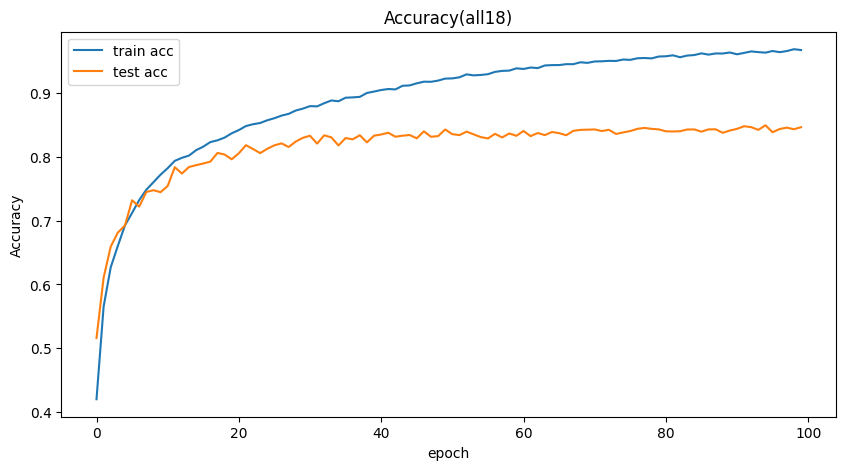

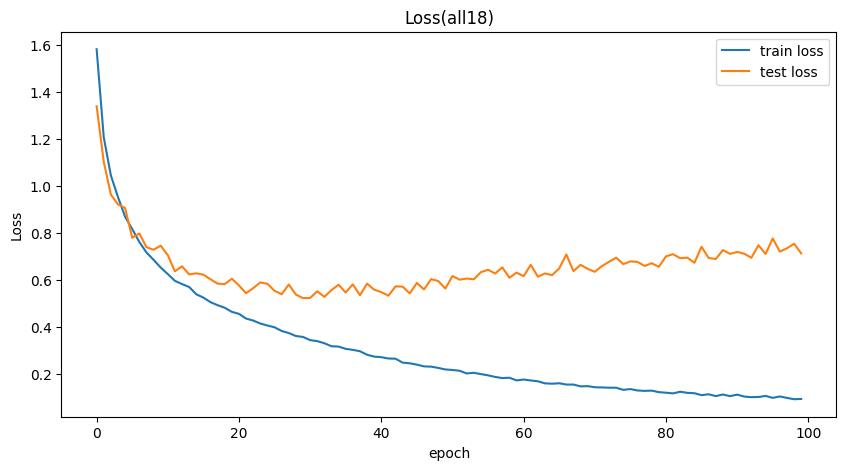

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 40/40 [00:04<00:00,  9.10it/s]


Epoch  1: Loss = 2.7582 Acc = 0.01 Test_Loss = 2.5374 Test_Acc = 0.10


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch  2: Loss = 2.3476 Acc = 0.01 Test_Loss = 2.2268 Test_Acc = 0.17


100%|██████████| 40/40 [00:04<00:00,  8.81it/s]


Epoch  3: Loss = 2.1669 Acc = 0.01 Test_Loss = 2.0259 Test_Acc = 0.25


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch  4: Loss = 2.0773 Acc = 0.02 Test_Loss = 1.9463 Test_Acc = 0.29


100%|██████████| 40/40 [00:04<00:00,  8.87it/s]


Epoch  5: Loss = 2.0838 Acc = 0.02 Test_Loss = 1.8505 Test_Acc = 0.32


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch  6: Loss = 2.0058 Acc = 0.02 Test_Loss = 1.8269 Test_Acc = 0.32


100%|██████████| 40/40 [00:04<00:00,  9.82it/s]


Epoch  7: Loss = 1.9416 Acc = 0.02 Test_Loss = 1.7641 Test_Acc = 0.35


100%|██████████| 40/40 [00:03<00:00, 11.29it/s]


Epoch  8: Loss = 1.9094 Acc = 0.02 Test_Loss = 1.7397 Test_Acc = 0.35


100%|██████████| 40/40 [00:04<00:00,  9.84it/s]


Epoch  9: Loss = 1.9152 Acc = 0.02 Test_Loss = 1.7626 Test_Acc = 0.37


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 10: Loss = 2.0051 Acc = 0.02 Test_Loss = 1.6988 Test_Acc = 0.38


100%|██████████| 40/40 [00:03<00:00, 10.73it/s]


Epoch 11: Loss = 1.8775 Acc = 0.02 Test_Loss = 1.6692 Test_Acc = 0.38


100%|██████████| 40/40 [00:03<00:00, 11.10it/s]


Epoch 12: Loss = 1.8137 Acc = 0.02 Test_Loss = 1.6964 Test_Acc = 0.38


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 13: Loss = 1.7933 Acc = 0.02 Test_Loss = 1.6182 Test_Acc = 0.40


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 14: Loss = 1.7227 Acc = 0.02 Test_Loss = 1.6442 Test_Acc = 0.39


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]


Epoch 15: Loss = 1.6952 Acc = 0.02 Test_Loss = 1.7602 Test_Acc = 0.39


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 16: Loss = 1.6808 Acc = 0.02 Test_Loss = 1.6243 Test_Acc = 0.41


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch 17: Loss = 1.7076 Acc = 0.03 Test_Loss = 2.5402 Test_Acc = 0.41


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 18: Loss = 1.6795 Acc = 0.03 Test_Loss = 1.8839 Test_Acc = 0.41


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 19: Loss = 1.6342 Acc = 0.03 Test_Loss = 1.5341 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 10.73it/s]


Epoch 20: Loss = 1.6375 Acc = 0.03 Test_Loss = 1.5515 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 21: Loss = 1.6730 Acc = 0.02 Test_Loss = 1.6498 Test_Acc = 0.40


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch 22: Loss = 1.6854 Acc = 0.03 Test_Loss = 2.0550 Test_Acc = 0.41


100%|██████████| 40/40 [00:04<00:00,  9.81it/s]


Epoch 23: Loss = 1.6846 Acc = 0.03 Test_Loss = 1.6205 Test_Acc = 0.41


100%|██████████| 40/40 [00:04<00:00,  8.53it/s]


Epoch 24: Loss = 1.6315 Acc = 0.03 Test_Loss = 1.5464 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 10.25it/s]


Epoch 25: Loss = 1.5990 Acc = 0.03 Test_Loss = 1.4632 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  9.07it/s]


Epoch 26: Loss = 1.6512 Acc = 0.03 Test_Loss = 1.5423 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.27it/s]


Epoch 27: Loss = 1.6559 Acc = 0.03 Test_Loss = 6.0077 Test_Acc = 0.40


100%|██████████| 40/40 [00:04<00:00,  8.69it/s]


Epoch 28: Loss = 1.5953 Acc = 0.03 Test_Loss = 1.6076 Test_Acc = 0.45


100%|██████████| 40/40 [00:04<00:00,  8.94it/s]


Epoch 29: Loss = 1.6306 Acc = 0.03 Test_Loss = 1.6089 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  9.85it/s]


Epoch 30: Loss = 1.6802 Acc = 0.03 Test_Loss = 2.3448 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 10.61it/s]


Epoch 31: Loss = 1.5796 Acc = 0.03 Test_Loss = 1.5684 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 10.27it/s]


Epoch 32: Loss = 1.5511 Acc = 0.03 Test_Loss = 1.6107 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch 33: Loss = 1.5180 Acc = 0.03 Test_Loss = 1.4492 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 34: Loss = 1.5600 Acc = 0.03 Test_Loss = 1.4496 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.13it/s]


Epoch 35: Loss = 1.4908 Acc = 0.03 Test_Loss = 1.4981 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 36: Loss = 1.4805 Acc = 0.03 Test_Loss = 1.4138 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 10.52it/s]


Epoch 37: Loss = 1.5692 Acc = 0.03 Test_Loss = 10.3199 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 10.09it/s]


Epoch 38: Loss = 1.9777 Acc = 0.02 Test_Loss = 16.9413 Test_Acc = 0.19


100%|██████████| 40/40 [00:04<00:00,  9.92it/s]


Epoch 39: Loss = 1.8864 Acc = 0.02 Test_Loss = 2.7338 Test_Acc = 0.35


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch 40: Loss = 1.7555 Acc = 0.02 Test_Loss = 1.8847 Test_Acc = 0.39


100%|██████████| 40/40 [00:04<00:00,  9.80it/s]


Epoch 41: Loss = 1.6497 Acc = 0.03 Test_Loss = 1.5548 Test_Acc = 0.43


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 42: Loss = 1.6891 Acc = 0.02 Test_Loss = 2.3241 Test_Acc = 0.41


100%|██████████| 40/40 [00:04<00:00,  8.31it/s]


Epoch 43: Loss = 1.6424 Acc = 0.02 Test_Loss = 2.0327 Test_Acc = 0.43


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 44: Loss = 1.6282 Acc = 0.03 Test_Loss = 1.5146 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  9.00it/s]


Epoch 45: Loss = 1.5553 Acc = 0.03 Test_Loss = 1.4906 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 10.02it/s]


Epoch 46: Loss = 1.5660 Acc = 0.03 Test_Loss = 1.6769 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  8.45it/s]


Epoch 47: Loss = 1.5312 Acc = 0.03 Test_Loss = 1.5794 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 11.08it/s]


Epoch 48: Loss = 1.5730 Acc = 0.03 Test_Loss = 1.4696 Test_Acc = 0.48


100%|██████████| 40/40 [00:04<00:00,  8.18it/s]


Epoch 49: Loss = 1.6016 Acc = 0.03 Test_Loss = 1.5138 Test_Acc = 0.49


100%|██████████| 40/40 [00:04<00:00,  9.27it/s]


Epoch 50: Loss = 1.5232 Acc = 0.03 Test_Loss = 1.4349 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.83it/s]


Epoch 51: Loss = 1.5145 Acc = 0.03 Test_Loss = 3.8640 Test_Acc = 0.30


100%|██████████| 40/40 [00:03<00:00, 10.52it/s]


Epoch 52: Loss = 1.8676 Acc = 0.02 Test_Loss = 12.6869 Test_Acc = 0.30


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch 53: Loss = 1.8188 Acc = 0.02 Test_Loss = 2.5500 Test_Acc = 0.35


100%|██████████| 40/40 [00:03<00:00, 10.01it/s]


Epoch 54: Loss = 1.7073 Acc = 0.02 Test_Loss = 1.6706 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 55: Loss = 1.6853 Acc = 0.02 Test_Loss = 1.9189 Test_Acc = 0.40


100%|██████████| 40/40 [00:04<00:00,  9.57it/s]


Epoch 56: Loss = 1.6526 Acc = 0.03 Test_Loss = 1.8037 Test_Acc = 0.43


100%|██████████| 40/40 [00:03<00:00, 10.95it/s]


Epoch 57: Loss = 1.7025 Acc = 0.03 Test_Loss = 1.5322 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  9.04it/s]


Epoch 58: Loss = 1.5310 Acc = 0.03 Test_Loss = 1.5352 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.16it/s]


Epoch 59: Loss = 1.5923 Acc = 0.03 Test_Loss = 1.5734 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  9.05it/s]


Epoch 60: Loss = 1.6321 Acc = 0.03 Test_Loss = 1.4729 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 10.69it/s]


Epoch 61: Loss = 1.4985 Acc = 0.03 Test_Loss = 1.4462 Test_Acc = 0.47


100%|██████████| 40/40 [00:04<00:00,  8.66it/s]


Epoch 62: Loss = 1.5547 Acc = 0.03 Test_Loss = 1.6966 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 10.96it/s]


Epoch 63: Loss = 1.4783 Acc = 0.03 Test_Loss = 1.7002 Test_Acc = 0.48


100%|██████████| 40/40 [00:04<00:00,  8.59it/s]


Epoch 64: Loss = 1.4992 Acc = 0.03 Test_Loss = 1.9185 Test_Acc = 0.47


100%|██████████| 40/40 [00:04<00:00,  8.78it/s]


Epoch 65: Loss = 1.5647 Acc = 0.03 Test_Loss = 1.4044 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 10.88it/s]


Epoch 66: Loss = 1.4797 Acc = 0.03 Test_Loss = 1.3484 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 10.80it/s]


Epoch 67: Loss = 1.4414 Acc = 0.03 Test_Loss = 1.3458 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 10.14it/s]


Epoch 68: Loss = 1.4584 Acc = 0.03 Test_Loss = 1.3948 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.07it/s]


Epoch 69: Loss = 1.4729 Acc = 0.03 Test_Loss = 1.4226 Test_Acc = 0.49


100%|██████████| 40/40 [00:04<00:00,  9.96it/s]


Epoch 70: Loss = 1.4607 Acc = 0.03 Test_Loss = 3.0900 Test_Acc = 0.47


100%|██████████| 40/40 [00:04<00:00,  8.53it/s]


Epoch 71: Loss = 1.4176 Acc = 0.03 Test_Loss = 1.7716 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]


Epoch 72: Loss = 1.4115 Acc = 0.03 Test_Loss = 1.5040 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.66it/s]


Epoch 73: Loss = 1.4336 Acc = 0.03 Test_Loss = 1.4082 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.18it/s]


Epoch 74: Loss = 1.4612 Acc = 0.03 Test_Loss = 1.3829 Test_Acc = 0.51


100%|██████████| 40/40 [00:05<00:00,  7.44it/s]


Epoch 75: Loss = 1.4013 Acc = 0.03 Test_Loss = 1.3568 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.75it/s]


Epoch 76: Loss = 1.4319 Acc = 0.03 Test_Loss = 1.4494 Test_Acc = 0.53


100%|██████████| 40/40 [00:04<00:00,  8.04it/s]


Epoch 77: Loss = 1.3951 Acc = 0.03 Test_Loss = 1.3741 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]


Epoch 78: Loss = 1.4396 Acc = 0.03 Test_Loss = 1.3824 Test_Acc = 0.50


100%|██████████| 40/40 [00:04<00:00,  8.75it/s]


Epoch 79: Loss = 1.4874 Acc = 0.03 Test_Loss = 1.4591 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 10.83it/s]


Epoch 80: Loss = 1.3887 Acc = 0.03 Test_Loss = 1.3866 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 10.25it/s]


Epoch 81: Loss = 1.3418 Acc = 0.03 Test_Loss = 1.3935 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 10.96it/s]


Epoch 82: Loss = 1.3410 Acc = 0.03 Test_Loss = 1.2890 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 10.30it/s]


Epoch 83: Loss = 1.3814 Acc = 0.03 Test_Loss = 1.5947 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 11.42it/s]


Epoch 84: Loss = 1.4615 Acc = 0.03 Test_Loss = 6.9865 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 85: Loss = 1.4279 Acc = 0.03 Test_Loss = 1.5688 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 11.27it/s]


Epoch 86: Loss = 1.4042 Acc = 0.03 Test_Loss = 1.3996 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.29it/s]


Epoch 87: Loss = 1.4098 Acc = 0.03 Test_Loss = 1.3552 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 88: Loss = 1.3443 Acc = 0.03 Test_Loss = 1.4573 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 11.00it/s]


Epoch 89: Loss = 1.3086 Acc = 0.03 Test_Loss = 1.5251 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 90: Loss = 1.3274 Acc = 0.03 Test_Loss = 1.2168 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 91: Loss = 1.1972 Acc = 0.04 Test_Loss = 1.2397 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 10.51it/s]


Epoch 92: Loss = 1.2272 Acc = 0.04 Test_Loss = 1.2023 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.19it/s]


Epoch 93: Loss = 1.2273 Acc = 0.03 Test_Loss = 1.2428 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 10.67it/s]


Epoch 94: Loss = 1.2752 Acc = 0.04 Test_Loss = 1.2092 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.33it/s]


Epoch 95: Loss = 1.3001 Acc = 0.04 Test_Loss = 1.2461 Test_Acc = 0.55


100%|██████████| 40/40 [00:04<00:00,  9.99it/s]


Epoch 96: Loss = 1.2662 Acc = 0.04 Test_Loss = 1.3031 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]


Epoch 97: Loss = 1.4057 Acc = 0.03 Test_Loss = 1.5725 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 10.05it/s]


Epoch 98: Loss = 1.5974 Acc = 0.03 Test_Loss = 1.9524 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.03it/s]


Epoch 99: Loss = 1.5306 Acc = 0.03 Test_Loss = 1.3771 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.60it/s]


Epoch 100: Loss = 1.6337 Acc = 0.03 Test_Loss = 5.7241 Test_Acc = 0.43
Done!


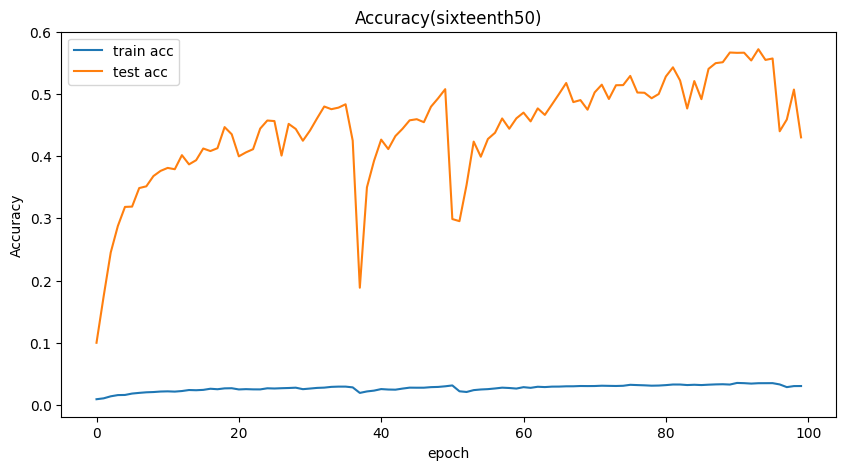

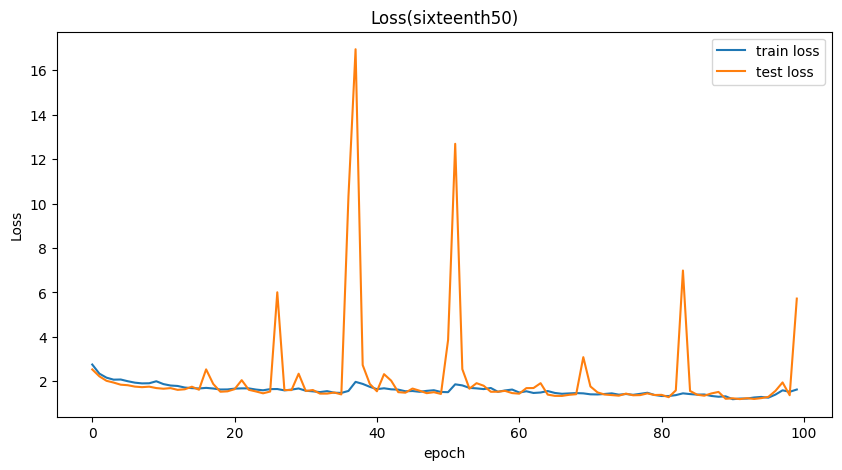

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 40/40 [00:04<00:00,  8.90it/s]


Epoch  1: Loss = 2.1307 Acc = 0.13 Test_Loss = 1.7335 Test_Acc = 0.36


100%|██████████| 40/40 [00:04<00:00,  8.87it/s]


Epoch  2: Loss = 1.7983 Acc = 0.19 Test_Loss = 1.5576 Test_Acc = 0.43


100%|██████████| 40/40 [00:04<00:00,  8.48it/s]


Epoch  3: Loss = 1.6515 Acc = 0.22 Test_Loss = 2.5336 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  8.65it/s]


Epoch  4: Loss = 1.5933 Acc = 0.22 Test_Loss = 21.0192 Test_Acc = 0.25


100%|██████████| 40/40 [00:04<00:00,  8.71it/s]


Epoch  5: Loss = 1.7241 Acc = 0.20 Test_Loss = 1.9183 Test_Acc = 0.37


100%|██████████| 40/40 [00:04<00:00,  9.03it/s]


Epoch  6: Loss = 1.6233 Acc = 0.22 Test_Loss = 296.5867 Test_Acc = 0.30


100%|██████████| 40/40 [00:04<00:00,  8.82it/s]


Epoch  7: Loss = 1.6014 Acc = 0.22 Test_Loss = 1.5170 Test_Acc = 0.48


100%|██████████| 40/40 [00:04<00:00,  9.05it/s]


Epoch  8: Loss = 1.5407 Acc = 0.24 Test_Loss = 2.0007 Test_Acc = 0.45


100%|██████████| 40/40 [00:04<00:00,  8.82it/s]


Epoch  9: Loss = 1.5287 Acc = 0.23 Test_Loss = 1.4376 Test_Acc = 0.50


100%|██████████| 40/40 [00:04<00:00,  8.79it/s]


Epoch 10: Loss = 1.4349 Acc = 0.25 Test_Loss = 1.6173 Test_Acc = 0.50


100%|██████████| 40/40 [00:04<00:00,  8.82it/s]


Epoch 11: Loss = 1.4627 Acc = 0.25 Test_Loss = 1.2966 Test_Acc = 0.54


100%|██████████| 40/40 [00:04<00:00,  9.01it/s]


Epoch 12: Loss = 1.3935 Acc = 0.26 Test_Loss = 1.9772 Test_Acc = 0.56


100%|██████████| 40/40 [00:04<00:00,  9.16it/s]


Epoch 13: Loss = 1.3517 Acc = 0.26 Test_Loss = 1.3680 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  8.76it/s]


Epoch 14: Loss = 1.3069 Acc = 0.28 Test_Loss = 3.3219 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  8.57it/s]


Epoch 15: Loss = 1.2816 Acc = 0.28 Test_Loss = 1.2455 Test_Acc = 0.55


100%|██████████| 40/40 [00:04<00:00,  8.52it/s]


Epoch 16: Loss = 1.2487 Acc = 0.28 Test_Loss = 1.1765 Test_Acc = 0.58


100%|██████████| 40/40 [00:04<00:00,  8.36it/s]


Epoch 17: Loss = 1.4943 Acc = 0.25 Test_Loss = 6.4287 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.15it/s]


Epoch 18: Loss = 1.3736 Acc = 0.26 Test_Loss = 1.4685 Test_Acc = 0.55


100%|██████████| 40/40 [00:04<00:00,  9.08it/s]


Epoch 19: Loss = 1.4197 Acc = 0.26 Test_Loss = 39.9380 Test_Acc = 0.42


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 20: Loss = 1.4076 Acc = 0.26 Test_Loss = 1.2013 Test_Acc = 0.57


100%|██████████| 40/40 [00:04<00:00,  9.13it/s]


Epoch 21: Loss = 1.2865 Acc = 0.28 Test_Loss = 1.2173 Test_Acc = 0.59


100%|██████████| 40/40 [00:04<00:00,  8.85it/s]


Epoch 22: Loss = 1.1766 Acc = 0.30 Test_Loss = 1.0787 Test_Acc = 0.61


100%|██████████| 40/40 [00:04<00:00,  9.53it/s]


Epoch 23: Loss = 1.2464 Acc = 0.29 Test_Loss = 1.5472 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 10.14it/s]


Epoch 24: Loss = 1.3771 Acc = 0.27 Test_Loss = 115.5509 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 10.19it/s]


Epoch 25: Loss = 1.3430 Acc = 0.26 Test_Loss = 1.3780 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 10.74it/s]


Epoch 26: Loss = 1.1907 Acc = 0.29 Test_Loss = 1.2716 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 10.41it/s]


Epoch 27: Loss = 1.1172 Acc = 0.31 Test_Loss = 1.2402 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.30it/s]


Epoch 28: Loss = 1.0980 Acc = 0.31 Test_Loss = 2.7251 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 29: Loss = 1.0568 Acc = 0.32 Test_Loss = 1.3207 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 11.29it/s]


Epoch 30: Loss = 1.0353 Acc = 0.32 Test_Loss = 2.1948 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 11.27it/s]


Epoch 31: Loss = 1.1956 Acc = 0.29 Test_Loss = 1.1140 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 11.22it/s]


Epoch 32: Loss = 1.1215 Acc = 0.31 Test_Loss = 10.0245 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 10.37it/s]


Epoch 33: Loss = 1.1503 Acc = 0.31 Test_Loss = 2.4127 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 11.16it/s]


Epoch 34: Loss = 1.1219 Acc = 0.31 Test_Loss = 1.0474 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 35: Loss = 1.0106 Acc = 0.33 Test_Loss = 2.0878 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 10.82it/s]


Epoch 36: Loss = 0.9767 Acc = 0.33 Test_Loss = 0.9614 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.31it/s]


Epoch 37: Loss = 1.0353 Acc = 0.33 Test_Loss = 1.0724 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 10.92it/s]


Epoch 38: Loss = 1.3209 Acc = 0.27 Test_Loss = 1.2113 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 10.79it/s]


Epoch 39: Loss = 1.1078 Acc = 0.31 Test_Loss = 10.9613 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 10.98it/s]


Epoch 40: Loss = 1.0477 Acc = 0.32 Test_Loss = 1.0023 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 11.33it/s]


Epoch 41: Loss = 0.9386 Acc = 0.34 Test_Loss = 0.8736 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 42: Loss = 0.9031 Acc = 0.34 Test_Loss = 0.9022 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 43: Loss = 0.9115 Acc = 0.35 Test_Loss = 2.5407 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 10.97it/s]


Epoch 44: Loss = 0.8659 Acc = 0.35 Test_Loss = 0.8951 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.88it/s]


Epoch 45: Loss = 0.8266 Acc = 0.36 Test_Loss = 0.8038 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch 46: Loss = 0.8112 Acc = 0.36 Test_Loss = 0.9202 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Epoch 47: Loss = 0.7979 Acc = 0.36 Test_Loss = 1.4940 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch 48: Loss = 0.7689 Acc = 0.37 Test_Loss = 1.4684 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 49: Loss = 0.7651 Acc = 0.37 Test_Loss = 1.1381 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 10.43it/s]


Epoch 50: Loss = 0.7769 Acc = 0.37 Test_Loss = 24.5744 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 10.10it/s]


Epoch 51: Loss = 1.1168 Acc = 0.31 Test_Loss = 1.9736 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 10.25it/s]


Epoch 52: Loss = 0.9722 Acc = 0.33 Test_Loss = 1.2984 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  9.84it/s]


Epoch 53: Loss = 0.9666 Acc = 0.34 Test_Loss = 1.6361 Test_Acc = 0.61


100%|██████████| 40/40 [00:04<00:00,  9.36it/s]


Epoch 54: Loss = 0.8959 Acc = 0.35 Test_Loss = 0.8424 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 10.36it/s]


Epoch 55: Loss = 0.9265 Acc = 0.34 Test_Loss = 1.3210 Test_Acc = 0.54


100%|██████████| 40/40 [00:04<00:00,  8.88it/s]


Epoch 56: Loss = 1.4248 Acc = 0.26 Test_Loss = 1.3528 Test_Acc = 0.55


100%|██████████| 40/40 [00:04<00:00,  9.73it/s]


Epoch 57: Loss = 1.2558 Acc = 0.29 Test_Loss = 1.0524 Test_Acc = 0.63


100%|██████████| 40/40 [00:04<00:00,  9.42it/s]


Epoch 58: Loss = 1.2122 Acc = 0.30 Test_Loss = 2.3415 Test_Acc = 0.38


100%|██████████| 40/40 [00:03<00:00, 10.09it/s]


Epoch 59: Loss = 1.4719 Acc = 0.24 Test_Loss = 1.4634 Test_Acc = 0.55


100%|██████████| 40/40 [00:04<00:00,  9.65it/s]


Epoch 60: Loss = 1.2918 Acc = 0.28 Test_Loss = 1.1656 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 10.51it/s]


Epoch 61: Loss = 1.2195 Acc = 0.29 Test_Loss = 1.0490 Test_Acc = 0.63


100%|██████████| 40/40 [00:04<00:00,  9.44it/s]


Epoch 62: Loss = 1.1255 Acc = 0.31 Test_Loss = 1.1685 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 10.02it/s]


Epoch 63: Loss = 1.1484 Acc = 0.31 Test_Loss = 1.2227 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 10.02it/s]


Epoch 64: Loss = 1.0881 Acc = 0.31 Test_Loss = 1.0826 Test_Acc = 0.63


100%|██████████| 40/40 [00:04<00:00,  9.19it/s]


Epoch 65: Loss = 1.0135 Acc = 0.33 Test_Loss = 0.9295 Test_Acc = 0.66


100%|██████████| 40/40 [00:04<00:00,  9.44it/s]


Epoch 66: Loss = 0.9910 Acc = 0.33 Test_Loss = 0.8731 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  9.22it/s]


Epoch 67: Loss = 0.9666 Acc = 0.33 Test_Loss = 0.9276 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  9.14it/s]


Epoch 68: Loss = 0.8995 Acc = 0.35 Test_Loss = 0.9317 Test_Acc = 0.70


100%|██████████| 40/40 [00:04<00:00,  8.67it/s]


Epoch 69: Loss = 0.8508 Acc = 0.35 Test_Loss = 1.0456 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 10.17it/s]


Epoch 70: Loss = 0.8193 Acc = 0.36 Test_Loss = 0.7736 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.01it/s]


Epoch 71: Loss = 0.8132 Acc = 0.36 Test_Loss = 0.7851 Test_Acc = 0.72


100%|██████████| 40/40 [00:04<00:00,  8.86it/s]


Epoch 72: Loss = 0.7966 Acc = 0.36 Test_Loss = 0.8003 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.02it/s]


Epoch 73: Loss = 0.7364 Acc = 0.37 Test_Loss = 0.7629 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]


Epoch 74: Loss = 0.7518 Acc = 0.37 Test_Loss = 0.8134 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  8.80it/s]


Epoch 75: Loss = 0.7384 Acc = 0.38 Test_Loss = 0.8833 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  8.97it/s]


Epoch 76: Loss = 0.7127 Acc = 0.38 Test_Loss = 0.9285 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  8.91it/s]


Epoch 77: Loss = 0.7119 Acc = 0.38 Test_Loss = 0.8319 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  8.94it/s]


Epoch 78: Loss = 0.6922 Acc = 0.38 Test_Loss = 0.8798 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  9.01it/s]


Epoch 79: Loss = 0.6581 Acc = 0.39 Test_Loss = 0.7378 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.34it/s]


Epoch 80: Loss = 0.6799 Acc = 0.38 Test_Loss = 0.7736 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  8.93it/s]


Epoch 81: Loss = 0.6600 Acc = 0.39 Test_Loss = 0.7220 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.17it/s]


Epoch 82: Loss = 0.6281 Acc = 0.39 Test_Loss = 0.6989 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  8.81it/s]


Epoch 83: Loss = 0.6086 Acc = 0.39 Test_Loss = 0.7874 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.51it/s]


Epoch 84: Loss = 0.6032 Acc = 0.39 Test_Loss = 0.9844 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.34it/s]


Epoch 85: Loss = 0.6271 Acc = 0.39 Test_Loss = 1.0228 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.03it/s]


Epoch 86: Loss = 0.5963 Acc = 0.40 Test_Loss = 0.7404 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.10it/s]


Epoch 87: Loss = 0.5916 Acc = 0.40 Test_Loss = 0.8829 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]


Epoch 88: Loss = 0.5661 Acc = 0.40 Test_Loss = 0.7202 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  9.37it/s]


Epoch 89: Loss = 0.5502 Acc = 0.40 Test_Loss = 0.7658 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  9.30it/s]


Epoch 90: Loss = 0.5801 Acc = 0.40 Test_Loss = 1.2072 Test_Acc = 0.62


100%|██████████| 40/40 [00:04<00:00,  8.93it/s]


Epoch 91: Loss = 0.8652 Acc = 0.36 Test_Loss = 0.7855 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  8.96it/s]


Epoch 92: Loss = 0.6497 Acc = 0.39 Test_Loss = 0.7826 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.05it/s]


Epoch 93: Loss = 0.5937 Acc = 0.40 Test_Loss = 0.6581 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  8.93it/s]


Epoch 94: Loss = 0.5575 Acc = 0.40 Test_Loss = 0.6566 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  8.91it/s]


Epoch 95: Loss = 0.5346 Acc = 0.40 Test_Loss = 0.6511 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  9.39it/s]


Epoch 96: Loss = 0.5172 Acc = 0.41 Test_Loss = 0.6292 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.82it/s]


Epoch 97: Loss = 0.5126 Acc = 0.41 Test_Loss = 0.6412 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  9.51it/s]


Epoch 98: Loss = 0.5131 Acc = 0.41 Test_Loss = 0.8293 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.21it/s]


Epoch 99: Loss = 0.5642 Acc = 0.40 Test_Loss = 0.6855 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]


Epoch 100: Loss = 0.5270 Acc = 0.41 Test_Loss = 0.6435 Test_Acc = 0.78
Done!


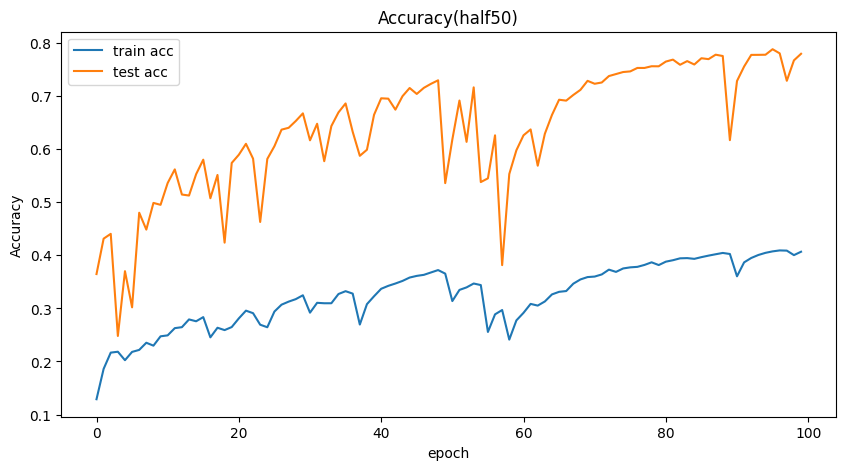

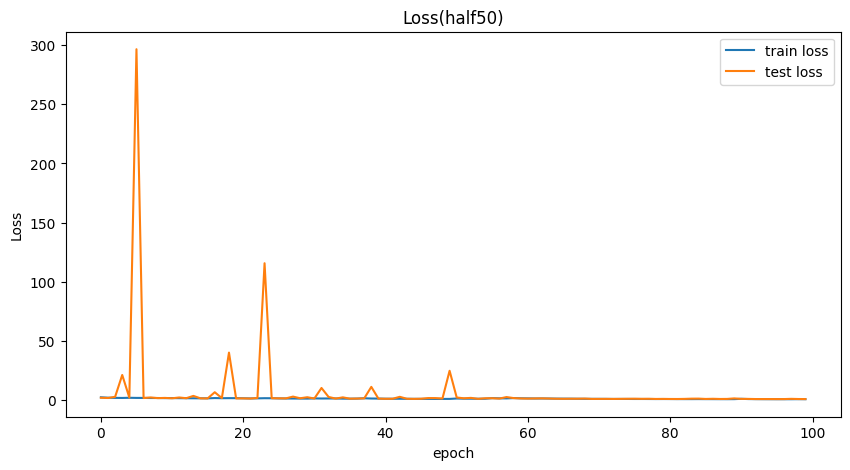

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 40/40 [00:04<00:00,  9.99it/s]


Epoch  1: Loss = 1.9500 Acc = 0.31 Test_Loss = 1.6794 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 10.95it/s]


Epoch  2: Loss = 1.6389 Acc = 0.43 Test_Loss = 1.6455 Test_Acc = 0.47


100%|██████████| 40/40 [00:04<00:00,  9.76it/s]


Epoch  3: Loss = 1.4823 Acc = 0.48 Test_Loss = 12.9456 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch  4: Loss = 1.3730 Acc = 0.51 Test_Loss = 1.3253 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch  5: Loss = 1.3138 Acc = 0.53 Test_Loss = 34.8542 Test_Acc = 0.29


100%|██████████| 40/40 [00:04<00:00,  8.40it/s]


Epoch  6: Loss = 1.3533 Acc = 0.53 Test_Loss = 2.9974 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 10.94it/s]


Epoch  7: Loss = 1.3700 Acc = 0.53 Test_Loss = 25.8485 Test_Acc = 0.28


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch  8: Loss = 1.4644 Acc = 0.48 Test_Loss = 1.2959 Test_Acc = 0.56


100%|██████████| 40/40 [00:04<00:00,  8.63it/s]


Epoch  9: Loss = 1.1840 Acc = 0.58 Test_Loss = 1.4637 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch 10: Loss = 1.2534 Acc = 0.56 Test_Loss = 1.4624 Test_Acc = 0.47


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 11: Loss = 1.6424 Acc = 0.42 Test_Loss = 2.2313 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  8.82it/s]


Epoch 12: Loss = 1.4561 Acc = 0.49 Test_Loss = 1.3037 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 11.10it/s]


Epoch 13: Loss = 1.2304 Acc = 0.56 Test_Loss = 1.1462 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 10.95it/s]


Epoch 14: Loss = 1.1057 Acc = 0.61 Test_Loss = 1.0366 Test_Acc = 0.63


100%|██████████| 40/40 [00:04<00:00,  8.87it/s]


Epoch 15: Loss = 1.0570 Acc = 0.63 Test_Loss = 0.9957 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.06it/s]


Epoch 16: Loss = 1.0370 Acc = 0.64 Test_Loss = 1.1769 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 17: Loss = 1.0647 Acc = 0.63 Test_Loss = 1.1032 Test_Acc = 0.61


100%|██████████| 40/40 [00:04<00:00,  8.95it/s]


Epoch 18: Loss = 1.0176 Acc = 0.65 Test_Loss = 0.8790 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 19: Loss = 0.9116 Acc = 0.69 Test_Loss = 1.4094 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 10.48it/s]


Epoch 20: Loss = 1.2206 Acc = 0.59 Test_Loss = 2.2939 Test_Acc = 0.60


100%|██████████| 40/40 [00:04<00:00,  9.73it/s]


Epoch 21: Loss = 1.0860 Acc = 0.63 Test_Loss = 0.9559 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.26it/s]


Epoch 22: Loss = 1.2264 Acc = 0.58 Test_Loss = 1.0640 Test_Acc = 0.63


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 23: Loss = 1.0132 Acc = 0.65 Test_Loss = 0.8797 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 10.21it/s]


Epoch 24: Loss = 0.8452 Acc = 0.70 Test_Loss = 0.8025 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 25: Loss = 0.8148 Acc = 0.71 Test_Loss = 0.7740 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  8.79it/s]


Epoch 26: Loss = 0.7409 Acc = 0.74 Test_Loss = 0.7225 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


Epoch 27: Loss = 0.7177 Acc = 0.75 Test_Loss = 0.7234 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.09it/s]


Epoch 28: Loss = 0.7035 Acc = 0.75 Test_Loss = 0.6815 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  8.97it/s]


Epoch 29: Loss = 0.6565 Acc = 0.77 Test_Loss = 0.6858 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 30: Loss = 0.6324 Acc = 0.78 Test_Loss = 0.7338 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.19it/s]


Epoch 31: Loss = 0.6765 Acc = 0.76 Test_Loss = 0.6601 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  8.13it/s]


Epoch 32: Loss = 0.6031 Acc = 0.79 Test_Loss = 0.6502 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.09it/s]


Epoch 33: Loss = 0.5790 Acc = 0.80 Test_Loss = 0.6050 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.47it/s]


Epoch 34: Loss = 0.5776 Acc = 0.80 Test_Loss = 0.6265 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  8.52it/s]


Epoch 35: Loss = 0.5480 Acc = 0.81 Test_Loss = 0.6048 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.08it/s]


Epoch 36: Loss = 0.5256 Acc = 0.81 Test_Loss = 0.5978 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 37: Loss = 0.5161 Acc = 0.82 Test_Loss = 0.5944 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  8.69it/s]


Epoch 38: Loss = 0.4958 Acc = 0.83 Test_Loss = 0.5926 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.18it/s]


Epoch 39: Loss = 0.4854 Acc = 0.83 Test_Loss = 3.5330 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 10.84it/s]


Epoch 40: Loss = 1.5169 Acc = 0.51 Test_Loss = 149.9757 Test_Acc = 0.28


100%|██████████| 40/40 [00:04<00:00,  8.90it/s]


Epoch 41: Loss = 1.5136 Acc = 0.47 Test_Loss = 1.2199 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 11.16it/s]


Epoch 42: Loss = 1.1448 Acc = 0.60 Test_Loss = 0.9655 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 43: Loss = 0.9348 Acc = 0.67 Test_Loss = 0.8062 Test_Acc = 0.72


100%|██████████| 40/40 [00:04<00:00,  9.03it/s]


Epoch 44: Loss = 0.7962 Acc = 0.73 Test_Loss = 0.8997 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 45: Loss = 0.7883 Acc = 0.73 Test_Loss = 0.9085 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 46: Loss = 0.8086 Acc = 0.72 Test_Loss = 0.6943 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.89it/s]


Epoch 47: Loss = 0.6368 Acc = 0.78 Test_Loss = 0.7033 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Epoch 48: Loss = 0.5775 Acc = 0.80 Test_Loss = 0.6391 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.38it/s]


Epoch 49: Loss = 0.5420 Acc = 0.81 Test_Loss = 0.6232 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.76it/s]


Epoch 50: Loss = 0.5097 Acc = 0.82 Test_Loss = 0.6043 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.27it/s]


Epoch 51: Loss = 0.4964 Acc = 0.83 Test_Loss = 0.5866 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.39it/s]


Epoch 52: Loss = 0.4737 Acc = 0.83 Test_Loss = 0.5633 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.61it/s]


Epoch 53: Loss = 0.4559 Acc = 0.84 Test_Loss = 0.5485 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch 54: Loss = 0.4379 Acc = 0.85 Test_Loss = 0.5770 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  9.12it/s]


Epoch 55: Loss = 0.4275 Acc = 0.85 Test_Loss = 0.5585 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 10.64it/s]


Epoch 56: Loss = 0.4114 Acc = 0.85 Test_Loss = 0.6029 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch 57: Loss = 0.4079 Acc = 0.86 Test_Loss = 0.5815 Test_Acc = 0.81


100%|██████████| 40/40 [00:04<00:00,  8.49it/s]


Epoch 58: Loss = 0.3933 Acc = 0.86 Test_Loss = 0.5355 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.05it/s]


Epoch 59: Loss = 0.3801 Acc = 0.87 Test_Loss = 0.5457 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 60: Loss = 0.3736 Acc = 0.87 Test_Loss = 0.5546 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  8.62it/s]


Epoch 61: Loss = 0.3656 Acc = 0.87 Test_Loss = 0.5298 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 62: Loss = 0.3507 Acc = 0.88 Test_Loss = 0.5570 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 63: Loss = 0.3488 Acc = 0.88 Test_Loss = 0.5539 Test_Acc = 0.82


100%|██████████| 40/40 [00:04<00:00,  8.89it/s]


Epoch 64: Loss = 0.3370 Acc = 0.88 Test_Loss = 0.5489 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 65: Loss = 0.3254 Acc = 0.89 Test_Loss = 0.6189 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.04it/s]


Epoch 66: Loss = 0.3315 Acc = 0.88 Test_Loss = 0.5477 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.24it/s]


Epoch 67: Loss = 0.3089 Acc = 0.89 Test_Loss = 0.5504 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Epoch 68: Loss = 0.3118 Acc = 0.89 Test_Loss = 0.5262 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.73it/s]


Epoch 69: Loss = 0.2994 Acc = 0.89 Test_Loss = 0.5574 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 70: Loss = 0.2865 Acc = 0.90 Test_Loss = 0.5528 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 71: Loss = 0.2840 Acc = 0.90 Test_Loss = 0.5379 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  9.81it/s]


Epoch 72: Loss = 0.2773 Acc = 0.90 Test_Loss = 0.5566 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 73: Loss = 0.2673 Acc = 0.91 Test_Loss = 0.5833 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.06it/s]


Epoch 74: Loss = 0.3051 Acc = 0.89 Test_Loss = 0.5568 Test_Acc = 0.83


100%|██████████| 40/40 [00:04<00:00,  8.73it/s]


Epoch 75: Loss = 0.2620 Acc = 0.91 Test_Loss = 0.5528 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.35it/s]


Epoch 76: Loss = 0.2515 Acc = 0.91 Test_Loss = 0.5684 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.25it/s]


Epoch 77: Loss = 0.2474 Acc = 0.91 Test_Loss = 0.5287 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.03it/s]


Epoch 78: Loss = 0.2350 Acc = 0.92 Test_Loss = 0.5827 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch 79: Loss = 0.2335 Acc = 0.92 Test_Loss = 0.5421 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.79it/s]


Epoch 80: Loss = 0.2284 Acc = 0.92 Test_Loss = 0.5575 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.22it/s]


Epoch 81: Loss = 0.2208 Acc = 0.92 Test_Loss = 0.5615 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch 82: Loss = 0.2180 Acc = 0.92 Test_Loss = 0.5830 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.39it/s]


Epoch 83: Loss = 0.2042 Acc = 0.93 Test_Loss = 0.6660 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.80it/s]


Epoch 84: Loss = 0.2085 Acc = 0.93 Test_Loss = 0.5635 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.96it/s]


Epoch 85: Loss = 0.1985 Acc = 0.93 Test_Loss = 0.5747 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  8.90it/s]


Epoch 86: Loss = 0.1997 Acc = 0.93 Test_Loss = 0.5720 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  9.56it/s]


Epoch 87: Loss = 0.1900 Acc = 0.93 Test_Loss = 0.5608 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch 88: Loss = 0.1873 Acc = 0.93 Test_Loss = 0.6030 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  8.77it/s]


Epoch 89: Loss = 0.1949 Acc = 0.93 Test_Loss = 0.5991 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]


Epoch 90: Loss = 0.1811 Acc = 0.94 Test_Loss = 0.5855 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]


Epoch 91: Loss = 0.1744 Acc = 0.94 Test_Loss = 0.5914 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  8.35it/s]


Epoch 92: Loss = 0.1696 Acc = 0.94 Test_Loss = 0.5659 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.27it/s]


Epoch 93: Loss = 0.1647 Acc = 0.94 Test_Loss = 0.6057 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.18it/s]


Epoch 94: Loss = 0.1621 Acc = 0.94 Test_Loss = 0.6342 Test_Acc = 0.84


100%|██████████| 40/40 [00:04<00:00,  8.56it/s]


Epoch 95: Loss = 0.1596 Acc = 0.94 Test_Loss = 0.5968 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.09it/s]


Epoch 96: Loss = 0.1611 Acc = 0.94 Test_Loss = 0.7689 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.22it/s]


Epoch 97: Loss = 0.2258 Acc = 0.92 Test_Loss = 0.5614 Test_Acc = 0.85


100%|██████████| 40/40 [00:04<00:00,  8.60it/s]


Epoch 98: Loss = 0.1549 Acc = 0.94 Test_Loss = 0.6113 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 10.32it/s]


Epoch 99: Loss = 0.1637 Acc = 0.94 Test_Loss = 0.5853 Test_Acc = 0.85


100%|██████████| 40/40 [00:03<00:00, 11.11it/s]


Epoch 100: Loss = 0.1499 Acc = 0.95 Test_Loss = 0.5885 Test_Acc = 0.85
Done!


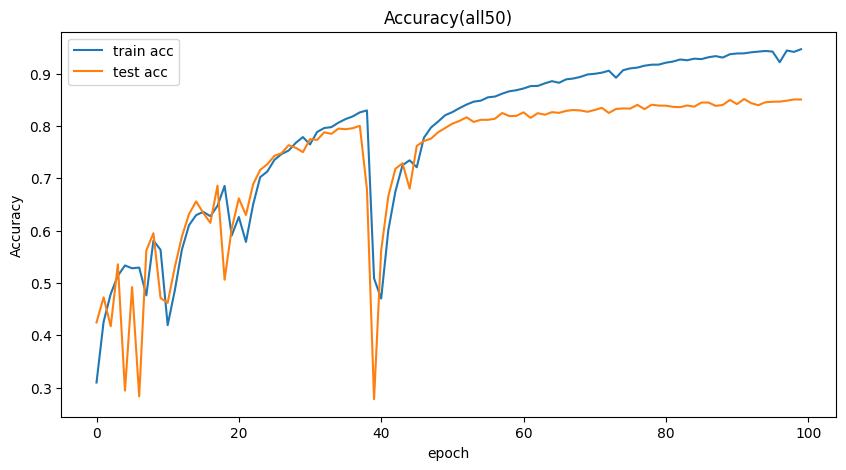

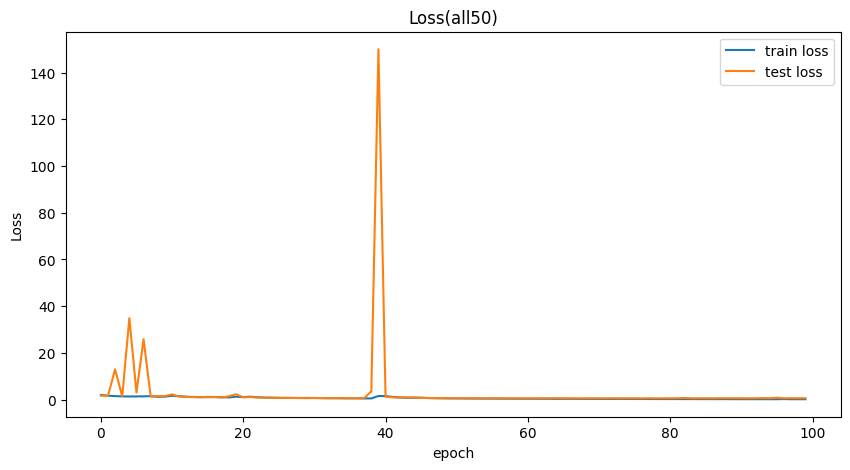

In [51]:
# TODO: Fill in the code cell according to the pytorch tutorial we gave.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
def train(dataloader, model, loss_fn, optimizer):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0

    model.train()

    for X, y in tqdm(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pred = pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(y.view_as(pred)).sum().item()

    avg_epoch_loss = epoch_loss / num_batches
    avg_acc = correct / size

    return avg_epoch_loss, avg_acc
def test(dataloader, model, loss_fn):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0

    model.eval()

    with torch.no_grad():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)

            pred = model(X)

            epoch_loss += loss_fn(pred, y).item()
            pred = pred.argmax(dim=1, keepdim=True)
            correct += pred.eq(y.view_as(pred)).sum().item()

    avg_epoch_loss = epoch_loss / num_batches
    avg_acc = correct / size

    return avg_epoch_loss, avg_acc
#sixteenth18-------------------------------------------------------------------------------------------------------------------------------------------------------------
epochs = 100
train_acc_plot = []
test_acc_plot = []
train_loss_plot = []
test_loss_plot = []
for epoch in range(epochs):
    train_loss, train_acc = train(sixteenth_train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    train_acc_plot.append(train_acc)
    test_acc_plot.append(test_acc)
    train_loss_plot.append(train_loss)
    test_loss_plot.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy(sixteenth18)")
plt.plot(train_acc_plot,label="train acc")
plt.plot(test_acc_plot,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss(sixteenth18)")
plt.plot(train_loss_plot,label="train loss")
plt.plot(test_loss_plot,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#half18-------------------------------------------------------------------------------------------------------------------------------------------------------------
model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
train_acc_plot_half18 = []
test_acc_plot_half18 = []
train_loss_plot_half18 = []
test_loss_plot_half18 = []
for epoch in range(epochs):
    train_loss, train_acc = train(half_train_dataloader, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    train_acc_plot_half18.append(train_acc)
    test_acc_plot_half18.append(test_acc)
    train_loss_plot_half18.append(train_loss)
    test_loss_plot_half18.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy(half18)")
plt.plot(train_acc_plot_half18,label="train acc")
plt.plot(test_acc_plot_half18,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss(half18)")
plt.plot(train_loss_plot_half18,label="train loss")
plt.plot(test_loss_plot_half18,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#all18-------------------------------------------------------------------------------------------------------------------------------------------------------------
model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
train_acc_plot_all18 = []
test_acc_plot_all18 = []
train_loss_plot_all18 = []
test_loss_plot_all18 = []
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    train_acc_plot_all18.append(train_acc)
    test_acc_plot_all18.append(test_acc)
    train_loss_plot_all18.append(train_loss)
    test_loss_plot_all18.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy(all18)")
plt.plot(train_acc_plot_all18,label="train acc")
plt.plot(test_acc_plot_all18,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss(all18)")
plt.plot(train_loss_plot_all18,label="train loss")
plt.plot(test_loss_plot_all18,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#sixteenth50-------------------------------------------------------------------------------------------------------------------------------------------------------------
model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
train_acc_plot_sixteenth50 = []
test_acc_plot_sixteenth50 = []
train_loss_plot_sixteenth50 = []
test_loss_plot_sixteenth50 = []
for epoch in range(epochs):
    train_loss, train_acc = train(sixteenth_train_dataloader, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    train_acc_plot_sixteenth50.append(train_acc)
    test_acc_plot_sixteenth50.append(test_acc)
    train_loss_plot_sixteenth50.append(train_loss)
    test_loss_plot_sixteenth50.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy(sixteenth50)")
plt.plot(train_acc_plot_sixteenth50,label="train acc")
plt.plot(test_acc_plot_sixteenth50,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss(sixteenth50)")
plt.plot(train_loss_plot_sixteenth50,label="train loss")
plt.plot(test_loss_plot_sixteenth50,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#half50-------------------------------------------------------------------------------------------------------------------------------------------------------------
model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
train_acc_plot_half50 = []
test_acc_plot_half50 = []
train_loss_plot_half50 = []
test_loss_plot_half50 = []
for epoch in range(epochs):
    train_loss, train_acc = train(half_train_dataloader, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    train_acc_plot_half50.append(train_acc)
    test_acc_plot_half50.append(test_acc)
    train_loss_plot_half50.append(train_loss)
    test_loss_plot_half50.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy(half50)")
plt.plot(train_acc_plot_half50,label="train acc")
plt.plot(test_acc_plot_half50,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss(half50)")
plt.plot(train_loss_plot_half50,label="train loss")
plt.plot(test_loss_plot_half50,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#all50-------------------------------------------------------------------------------------------------------------------------------------------------------------
model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
train_acc_plot_all50 = []
test_acc_plot_all50 = []
train_loss_plot_all50 = []
test_loss_plot_all50 = []
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    train_acc_plot_all50.append(train_acc)
    test_acc_plot_all50.append(test_acc)
    train_loss_plot_all50.append(train_loss)
    test_loss_plot_all50.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy(all50)")
plt.plot(train_acc_plot_all50,label="train acc")
plt.plot(test_acc_plot_all50,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss(all50)")
plt.plot(train_loss_plot_all50,label="train loss")
plt.plot(test_loss_plot_all50,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Dataset size vs Accuracy-------------------------------------------------------------------------------------------------------------------------------------------
sampler_2 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.2))
sampler_4 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.4))
sampler_6 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.6))
sampler_8 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.8))
dataloader_2 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_2)
dataloader_4 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_4)
dataloader_6 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_6)
dataloader_8 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_8)

test_acc_small = []
test_acc_big = []

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_2, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_4, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_6, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_8, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_2, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_4, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_6, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_8, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

dataset_size = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.plot(dataset_size,test_acc_small, label='Small Model')
plt.plot(dataset_size,test_acc_big, label = 'Big Model')
plt.title('Dataset Size vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Dataset Size')
plt.legend()
plt.show()

## Codes for Problem 3

In [52]:
# TODO: Try to achieve the best performance given all training data using whatever model and training strategy.
# (New) (You cannot use the model that was pretrained on CIFAR10)
epochs_d = 100
densenet_acc_plot = []
densenet_test_acc_plot = []
densenet_loss_plot = []
densenet_test_loss_plot = []
# HINT: Remember to change the model to 'resnet50' and the weights to weights="IMAGENET1K_V1" when needed.
model_densenet = torch.hub.load('pytorch/vision:v0.10.0', 'densenet201', weights=None)
# Background: The original resnet18 is designed for ImageNet dataset to predict 1000 classes.
# TODO: Change the output of the model to 10 class.
model_densenet.fc=nn.Linear(in_features=1920,out_features=10,bias=True)
model_densenet=model_densenet.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_densenet.parameters(), lr=1e-3)
for epoch in range(epochs_d):
    train_loss, train_acc = train(train_dataloader, model_densenet, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_densenet, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
    densenet_acc_plot.append(train_acc)
    densenet_test_acc_plot.append(test_acc)
    densenet_loss_plot.append(train_loss)
    densenet_test_loss_plot.append(test_loss)
print("Done!")
plt.figure(figsize=(10,5))
plt.title("Accuracy")
plt.plot(densenet_acc_plot,label="densenet201 train acc")
plt.plot(densenet_test_acc_plot,label="test acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Loss")
plt.plot(densenet_loss_plot,label="densenet201 train loss")
plt.plot(densenet_test_loss_plot,label="test loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Problems

1. (30%) Finish the rest of the codes for Problem 1 and Problem 2 according to the hint. (2 code cells in total.)
2. Train small model (resnet18) and big model (resnet50) from scratch on `sixteenth_train_dataloader`, `half_train_dataloader`, and `train_dataloader` respectively.
3. (30%) Achieve the best performance given all training data using whatever model and training strategy.  
  (You cannot use the model that was pretrained on CIFAR10)



## Discussion

Write down your insights in the report. The file name should be report.pdf.
For the following discussion, please present the results graphically as shown in Fig. 1 and discuss them.

- (30%) The relationship between the accuracy, model size, and the training dataset size.  
    (Total 6 models. Small model trains on the sixteenth, half, and all data. Big model trains on the sixteenth, half, and all data. If the result is different from Fig.1, please explain the possible reasons.)
- (10%) What if we train the ResNet with ImageNet initialized weights (`weights="IMAGENET1K_V1"`).
Please explain why the relationship changed this way?

Hint: You can try different hyperparameters combinations when training the models.

## Credits

1. [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)